# K Nearest Neighbours

In [1]:
import pandas as pd 
import numpy as np 
from numpy import * 
from sklearn.neighbors import KNeighborsClassifier as knn 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report 
import math 
import seaborn as sns 
import math 
import matplotlib.pyplot as plt 
import warnings  
warnings.filterwarnings('ignore')

In [2]:
col = ['sepal_length','sepal_width','petal_length','petal_width','iris_type']
exp5 = pd.read_csv('iris.csv',names=col)
exp5.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = exp5.iloc[:, :-1].values 
y = exp5.iloc[:, -1].values 

In [5]:
def euc_dist(x1, x2): 
    distance = np.sum((x1 - x2)**2) 
    return np.sqrt(distance) 

def knn(X_test, X_train, y_train, k): 
    predictions = [] 
    for x_test in X_test: 
        distances = [euc_dist(x_test, x_train) for x_train in X_train] 
        k_neighbours = np.argsort(distances)[:k] 
        nearest_labels = [y_train[i] for i in k_neighbours] 
        pred_class = max(set(nearest_labels), key=nearest_labels.count) 
        predictions.append(pred_class) 
    return predictions 


In [24]:
X_test, X_train, y_test, y_train = train_test_split(X, y,test_size=0.25,random_state=20) 

predictions = knn(X_test, X_train, y_train, k=8)
 
accuracy = np.mean(predictions == y_test) * 100 
print('Accuracy =', accuracy) 

Accuracy = 97.32142857142857


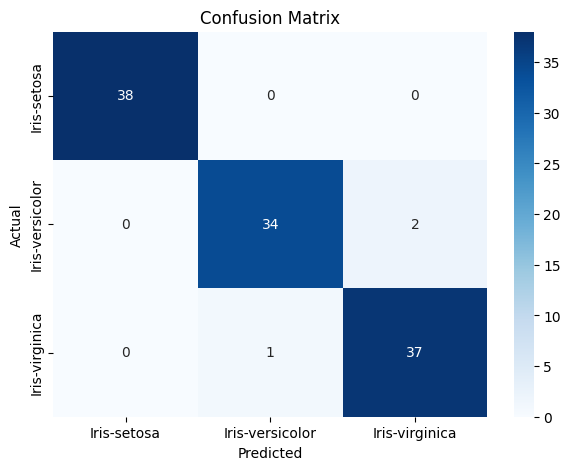

In [27]:
cm = confusion_matrix(y_test, predictions) 
plt.figure(figsize=(7, 5)) 
label,unique = pd.factorize(y) 
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=unique, yticklabels=unique) 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title('Confusion Matrix') 
plt.show() 

In [28]:
test_val = np.array([[3.5, 2.5, 1.2, 0.9]]) 
pred_class = knn(test_val, X, y, 5) 
print("Predicted Class: ", pred_class)

Predicted Class:  ['Iris-setosa']
